In [2]:
!pip uninstall tensorflow -y
!pip uninstall keras -y
!pip install keras==2.9.0
!pip install tensorflow==2.9.0

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0
Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Successfully uninstalled keras-2.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 54.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: tensorboard-data-server
   

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split

In [2]:
(X_train,_),(X_test,_) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [20]:
X_train = X_train/255
X_test = X_test/255
X_train,X_test = train_test_split(X_train, random_state=42, test_size=0.3)
X_train,X_val = train_test_split(X_train, random_state=42, test_size=0.3)
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

In [50]:
Input_img = Input(shape=(28, 28, 1))
def add_gaussian_noise(img):
  noise = np.random.normal(loc=0,scale=50,size=img.shape)
  noisy_img = img + noise
  return noisy_img

def create_autoencoder(optimizer='adam', learning_rate=0.0001):
    model = tf.keras.Sequential()
    x1 = Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))(Input_img)
    x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
    x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)
    x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
    x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
    x6 = UpSampling2D((2, 2))(x5)
    x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
    x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
    x9 = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

In [51]:
eps = 200
bs = 32
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=10,
        zoom_range=0.2,
        horizontal_flip=True,
        preprocessing_function=add_gaussian_noise,
        fill_mode="nearest"
    )
autoencoder = create_autoencoder('adam',0.001)
callback = EarlyStopping(monitor='loss', patience=10)
history = autoencoder.fit_generator(datagen.flow(X_train, X_train, batch_size=bs),
epochs=eps, steps_per_epoch = X_train.shape[0]//bs,
validation_data=datagen.flow(X_val, X_val, batch_size=bs),
callbacks=[callback],verbose=1)


Epoch 1/200
1/6 [====>.........................] - ETA: 0s - loss: 2.5952e-35

<ipython-input-51-68f64106b0f0>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = autoencoder.fit_generator(datagen.flow(X_train, X_train, batch_size=bs),


6/6 [==============================] - 0s 52ms/step - loss: 2.5340e-35 - val_loss: 2.3510e-35
Epoch 2/200
6/6 [==============================] - 0s 34ms/step - loss: 2.5944e-35 - val_loss: 2.5871e-35
Epoch 3/200
6/6 [==============================] - 0s 32ms/step - loss: 2.6543e-35 - val_loss: 2.5062e-35
Epoch 4/200
6/6 [==============================] - 0s 30ms/step - loss: 2.6706e-35 - val_loss: 2.4255e-35
Epoch 5/200
6/6 [==============================] - 0s 28ms/step - loss: 2.6048e-35 - val_loss: 2.5252e-35
Epoch 6/200
6/6 [==============================] - 0s 36ms/step - loss: 2.4479e-35 - val_loss: 2.3893e-35
Epoch 7/200
6/6 [==============================] - 0s 30ms/step - loss: 2.6274e-35 - val_loss: 2.3779e-35
Epoch 8/200
6/6 [==============================] - 0s 30ms/step - loss: 2.5710e-35 - val_loss: 2.5066e-35
Epoch 9/200
6/6 [==============================] - 0s 30ms/step - loss: 2.4098e-35 - val_loss: 2.4956e-35
Epoch 10/200
6/6 [==============================] - 0s 31m

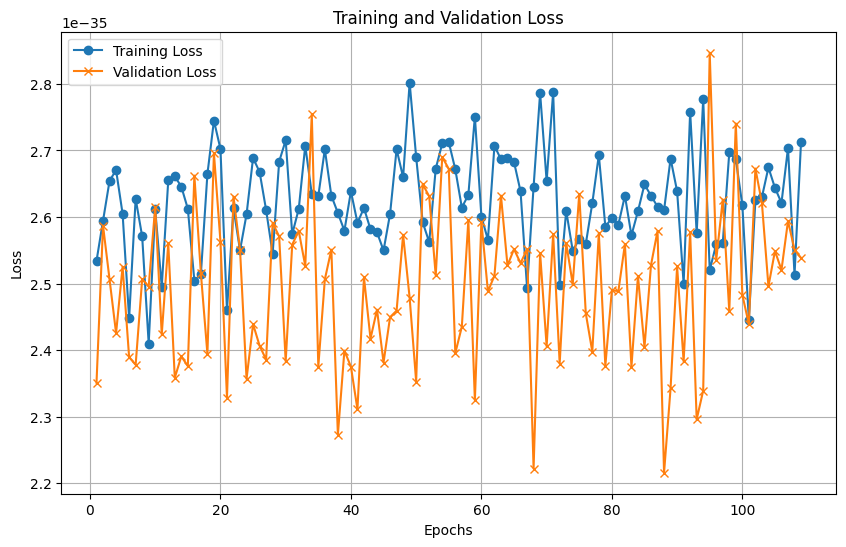

In [52]:
import matplotlib.pyplot as plt

# Access the training loss and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 25ms/step


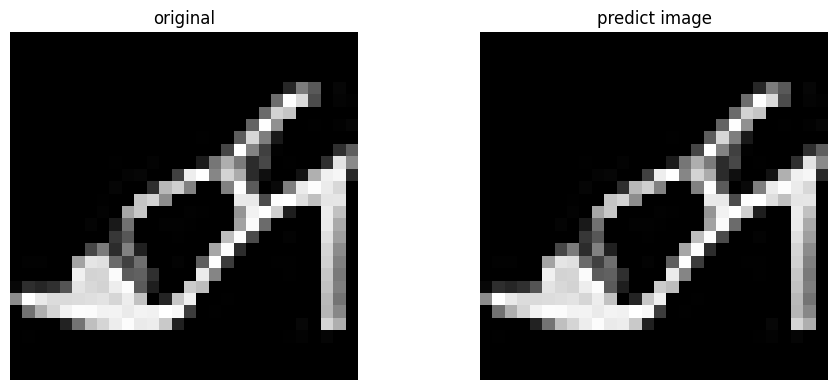

In [57]:
x_test_noisy = add_gaussian_noise(X_test[0])
predict_test = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy,cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(predict_test,cmap='gray')
plt.title('predict image')
plt.axis('off')
plt.tight_layout()
plt.show()